# G2M insight for cab investment

XYZ is a private firm based in the US that would like to invest in the cab industry due to its recent growth. They would like to understand the market before taking the leap.

OBJECTIVE: To give the company valuable insight that will help them make the decision

#### Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

#### Importing the data

We have been provided with 4 datasets that will help us understand the cab industry across the United states better.

In [45]:
cityData = pd.read_csv("C:/Users/user/Downloads/City.csv")
cabData = pd.read_csv("C:/Users/user/Downloads/Cab_Data2.csv/Cab_Data.csv")
transactionData = pd.read_csv("C:/Users/user/Downloads/Transaction_ID.csv")
customerData = pd.read_csv("C:/Users/user/Downloads/Customer_ID.csv")

Upon taking a closer look at the data, we can hope to get the following from the datasets:
- Popularity of cab services according to cities
- Which of the two cab services charges more per kilometre
- Cab service preference according to gender
- Cab service preference according to age group
- Cab service preference according to income 
- Preferred mode of payment by customers
- Customer loyalty(if customers are using the cab services repeatedly)
- is there seasonality in the use of cab services?



### Hypotheses

Using the data we have, we may test the following hypotheses:
- Pink cab is more affordable compared to Yellow cab
- There is some gender preference when it comes to selecting a cab service
- There is a preffered mode of payment by customers 
- There is seasonality in the number of people using the cab service
- A certain income group prefers a certain cab service
- A cerain age group prefers a certain cab service
- Customers using a certain cab sevice tend to use it again

We could join cabData with transactionData and customerData in order to get more insight on the customers and their interactions with both cab services

In [4]:
# first merging transactionData with customerData
merge1df = pd.merge(customerData, transactionData, on='Customer ID', how='outer' )
# displaying the first 5 rows of the dataset
merge1df.head(5)

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card


In [5]:
# merge the above dataset with cabData
finalMerge = pd.merge(cabData, merge1df, on='Transaction ID', how='outer')
# displaying the first 5 rows of the dataset
finalMerge.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card


### Wrangling/ Cleaning the final dataset

##### Evaluating for missing data

In [6]:
missing_data = finalMerge.isnull()
missing_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


##### Counting missing data values

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Transaction ID
False    440098
Name: Transaction ID, dtype: int64

Date of Travel
False    359392
True      80706
Name: Date of Travel, dtype: int64

Company
False    359392
True      80706
Name: Company, dtype: int64

City
False    359392
True      80706
Name: City, dtype: int64

KM Travelled
False    359392
True      80706
Name: KM Travelled, dtype: int64

Price Charged
False    359392
True      80706
Name: Price Charged, dtype: int64

Cost of Trip
False    359392
True      80706
Name: Cost of Trip, dtype: int64

Customer ID
False    440098
Name: Customer ID, dtype: int64

Gender
False    440098
Name: Gender, dtype: int64

Age
False    440098
Name: Age, dtype: int64

Income (USD/Month)
False    440098
Name: Income (USD/Month), dtype: int64

Payment_Mode
False    440098
Name: Payment_Mode, dtype: int64



Judging from the output above, it seems some transactions were not fully recorded on the cabData dataset. We cannot replace the missing values since most of them are discrete and this will make our data less accurate. We will have to drop the rows with the missing values

##### Dropping the missing rows

In [8]:
finalMerge.drop(finalMerge.index[359392:440097], inplace=True)
finalMerge.tail(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card
359391,10440107,02-01-2018,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Male,20,11284,Card
440097,10439820,NaN,NaN,NaN,NaN,NaN,NaN,14971,Male,30,15346,Card


##### Evaluating for duplicate values

In [9]:
bool_series = finalMerge.duplicated()
bool_series.head(5)

0    False
1    False
2    False
3    False
4    False
dtype: bool

##### Counting the duplicate values

In [10]:
# Use the keep parameter to consider only the first instance of a duplicate row to be unique
bool_series = finalMerge.duplicated(keep='first')
print('Boolean series:')
print(bool_series)
print('\n')
print('DataFrame after keeping only the first instance of the duplicate rows:')

# The `~` sign is used for negation. It changes the boolean value True to False and False to True.

finalMerge[~bool_series]

Boolean series:
0         False
1         False
2         False
3         False
4         False
          ...  
359388    False
359389    False
359390    False
359391    False
440097    False
Length: 359393, dtype: bool


DataFrame after keeping only the first instance of the duplicate rows:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card
359391,10440107,02-01-2018,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,52917,Male,20,11284,Card


### Feature Transformation
Feature transformation is the process of modifying your data but still keeping the information. this makes data analysis much simpler by making the renge of data smaller or by grouping data into categories. First, we have to know the data type of each variable

In [11]:
finalMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359393 entries, 0 to 440097
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359393 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359393 non-null  int64  
 8   Gender              359393 non-null  object 
 9   Age                 359393 non-null  int64  
 10  Income (USD/Month)  359393 non-null  int64  
 11  Payment_Mode        359393 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


We shall turn categorical variables into quantitive values(One hot encoding)

In [12]:
# cab types
pd.get_dummies(finalMerge['Company'])

,Pink Cab,Yellow Cab
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
359388,0,1
359389,0,1
359390,0,1
359391,0,1


In [13]:
# gender
pd.get_dummies(finalMerge['Gender'])

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
359388,0,1
359389,0,1
359390,0,1
359391,0,1


In [14]:
# payment method
pd.get_dummies(finalMerge['Payment_Mode'])

,Card,Cash
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
359388,0,1
359389,0,1
359390,1,0
359391,1,0


In [15]:
pd.get_dummies(finalMerge['City'])

,ATLANTA GA,AUSTIN TX,BOSTON MA,CHICAGO IL,DALLAS TX,DENVER CO,LOS ANGELES CA,MIAMI FL,NASHVILLE TN,NEW YORK NY,ORANGE COUNTY,PHOENIX AZ,PITTSBURGH PA,SACRAMENTO CA,SAN DIEGO CA,SEATTLE WA,SILICON VALLEY,TUCSON AZ,WASHINGTON DC
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
359391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


We shall group some of our numerical variables into categorical variables(Binning)

In [16]:
# income
binsIncome = np.linspace(min(finalMerge["Income (USD/Month)"]), max(finalMerge["Income (USD/Month)"]),4)
group_names = ["Low", "Middle", "High"]
finalMerge["Income-binned"] = pd.cut(finalMerge["Income (USD/Month)"], binsIncome, labels = group_names, include_lowest=True)

In [17]:
# age
binsAge = np.linspace(min(finalMerge["Age"]), max(finalMerge["Age"]),5)
group_names2 = ["Young Adult", "Adult", "Middle Age", "Senior"]
finalMerge["Age-binned"] = pd.cut(finalMerge["Age"], binsAge, labels = group_names2, include_lowest=True)

### Profit column
A new column, profit, will be created by getting the difference between the price charged and the cost of the trip 

In [18]:
finalMerge = finalMerge.assign(profit = finalMerge['Price Charged'] - finalMerge['Cost of Trip'])

print(finalMerge)

        Transaction ID Date of Travel     Company           City  \
0             10000011     08-01-2016    Pink Cab     ATLANTA GA   
1             10000012     06-01-2016    Pink Cab     ATLANTA GA   
2             10000013     02-01-2016    Pink Cab     ATLANTA GA   
3             10000014     07-01-2016    Pink Cab     ATLANTA GA   
4             10000015     03-01-2016    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359388        10440104     04-01-2018  Yellow Cab  WASHINGTON DC   
359389        10440105     05-01-2018  Yellow Cab  WASHINGTON DC   
359390        10440106     05-01-2018  Yellow Cab  WASHINGTON DC   
359391        10440107     02-01-2018  Yellow Cab  WASHINGTON DC   
440097        10439820            NaN         NaN            NaN   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Gender  Age  \
0              30.45         370.95      313.6350        29290   Male   28   
1              28.62       

##### Extracting a year column from the Date of Travel column


In [19]:
#pandas datetimeindex docs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
#efficient way to extract year from string format date
finalMerge['year'] = pd.DatetimeIndex(finalMerge['Date of Travel']).year
finalMerge.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Income-binned,Age-binned,profit,year
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,Low,Young Adult,57.315,2016.0
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,Low,Young Adult,23.666,2016.0
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,Low,Middle Age,27.568,2016.0
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,Middle,Young Adult,25.798,2016.0
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,Low,Adult,16.844,2016.0


In [20]:
finalMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359393 entries, 0 to 440097
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Transaction ID      359393 non-null  int64   
 1   Date of Travel      359392 non-null  object  
 2   Company             359392 non-null  object  
 3   City                359392 non-null  object  
 4   KM Travelled        359392 non-null  float64 
 5   Price Charged       359392 non-null  float64 
 6   Cost of Trip        359392 non-null  float64 
 7   Customer ID         359393 non-null  int64   
 8   Gender              359393 non-null  object  
 9   Age                 359393 non-null  int64   
 10  Income (USD/Month)  359393 non-null  int64   
 11  Payment_Mode        359393 non-null  object  
 12  Income-binned       359393 non-null  category
 13  Age-binned          359393 non-null  category
 14  profit              359392 non-null  float64 
 15  year             

#### Profit per kilometer by cab service

In [21]:
# We will have to create a new column for profit per km
finalMerge = finalMerge.assign(profitPerKM = finalMerge['profit']/finalMerge['KM Travelled'])
finalMerge.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Income-binned,Age-binned,profit,year,profitPerKM
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,Low,Young Adult,57.315,2016.0,1.882266
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,Low,Young Adult,23.666,2016.0,0.826904
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,Low,Middle Age,27.568,2016.0,3.049558
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,Middle,Young Adult,25.798,2016.0,0.777751
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,Low,Adult,16.844,2016.0,1.929439


I Want to split my finalMerge dataset into two, by each cab service

In [22]:
yellowcabData= finalMerge[finalMerge.Company.isin(['Yellow Cab'])]
print(yellowcabData.shape)
yellowcabData.head()
yellowcab= finalMerge[finalMerge.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()

(274681, 17)
(274681, 17)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Income-binned,Age-binned,profit,year,profitPerKM
233,10000384,02-01-2016,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Male,23,8542,Card,Low,Young Adult,877.0076,2016.0,25.847557
234,10000385,09-01-2016,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Male,28,3901,Cash,Low,Young Adult,895.7768,2016.0,21.237003
235,10000386,03-01-2016,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Male,32,13505,Cash,Middle,Adult,232.3320,2016.0,21.918113
236,10000387,06-01-2016,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Male,39,28386,Cash,High,Adult,504.1600,2016.0,18.847103
237,10000388,07-01-2016,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,29039,Male,35,17761,Card,Middle,Adult,944.1908,2016.0,20.516967


In [23]:
pinkcabData= finalMerge[finalMerge.Company.isin(['Pink Cab'])]
print(pinkcabData.shape)
pinkcabData.head()
pinkcab= finalMerge[finalMerge.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(84711, 17)
(84711, 17)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Income-binned,Age-binned,profit,year,profitPerKM
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,Low,Young Adult,57.315,2016.0,1.882266
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,Low,Young Adult,23.666,2016.0,0.826904
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,Low,Middle Age,27.568,2016.0,3.049558
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,Middle,Young Adult,25.798,2016.0,0.777751
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,Low,Adult,16.844,2016.0,1.929439


In [24]:
j=finalMerge.groupby(['Company', 'year']).profit.sum().to_frame('profit')
j.head()


profit
Company    year                
Pink Cab   2016.0  1.713511e+06
           2017.0  2.033655e+06
           2018.0  1.560162e+06
Yellow Cab 2016.0  1.392700e+07
           2017.0  1.657598e+07

### Exploratory Data analysis

#### Travel frequency by cab service

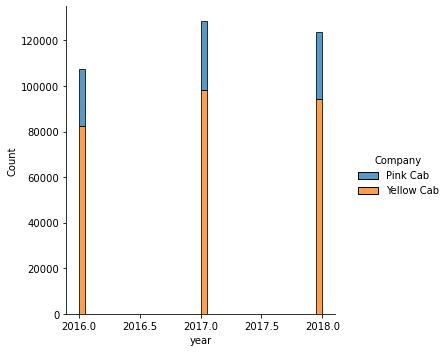

In [25]:
sns.displot(x='year', hue='Company', data=finalMerge, multiple='stack')

#### Travel Frequency by city

[Text(0, 0, 'ATLANTA GA'),
 Text(1, 0, 'AUSTIN TX'),
 Text(2, 0, 'BOSTON MA'),
 Text(3, 0, 'CHICAGO IL'),
 Text(4, 0, 'DALLAS TX'),
 Text(5, 0, 'DENVER CO'),
 Text(6, 0, 'LOS ANGELES CA'),
 Text(7, 0, 'MIAMI FL'),
 Text(8, 0, 'NASHVILLE TN'),
 Text(9, 0, 'NEW YORK NY'),
 Text(10, 0, 'ORANGE COUNTY'),
 Text(11, 0, 'PHOENIX AZ'),
 Text(12, 0, 'PITTSBURGH PA'),
 Text(13, 0, 'SACRAMENTO CA'),
 Text(14, 0, 'SAN DIEGO CA'),
 Text(15, 0, 'SEATTLE WA'),
 Text(16, 0, 'SILICON VALLEY'),
 Text(17, 0, 'TUCSON AZ'),
 Text(18, 0, 'WASHINGTON DC')]

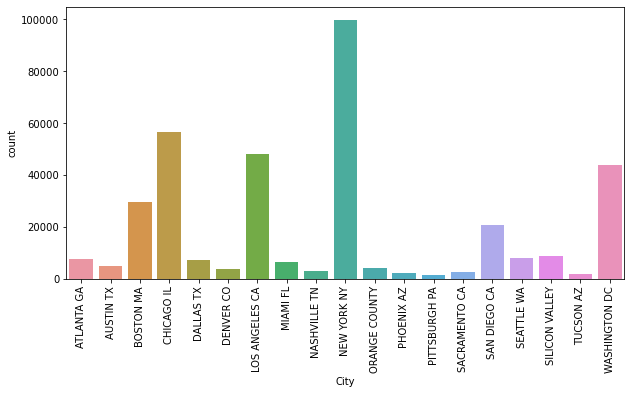

In [26]:
plt.figure(figsize=(10,5))
chart2 = sns.countplot(x='City', data=finalMerge)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)


#### Travel frequency by year

<AxesSubplot:xlabel='year', ylabel='count'>

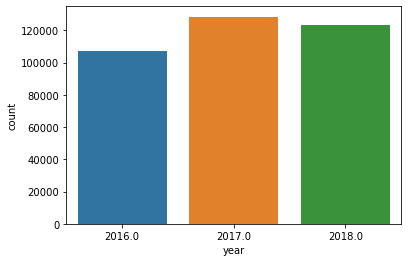

In [27]:
sns.countplot(x='year', data=finalMerge)

#### Travel frequency by month


In [28]:
finalMerge['month'] = pd.DatetimeIndex(finalMerge['Date of Travel']).month
finalMerge.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Income-binned,Age-binned,profit,year,profitPerKM,month
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Male,28,10813,Card,Low,Young Adult,57.315,2016.0,1.882266,8.0
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Male,27,9237,Card,Low,Young Adult,23.666,2016.0,0.826904,6.0
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Male,53,11242,Cash,Low,Middle Age,27.568,2016.0,3.049558,2.0
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Male,23,23327,Cash,Middle,Young Adult,25.798,2016.0,0.777751,7.0
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Male,33,8536,Card,Low,Adult,16.844,2016.0,1.929439,3.0


<AxesSubplot:xlabel='month', ylabel='count'>

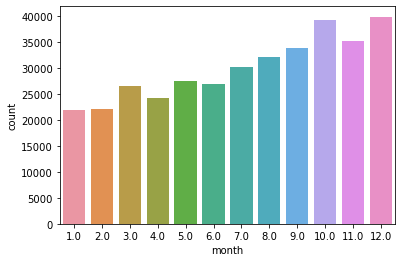

In [29]:
sns.countplot(x='month', data= finalMerge)

We can draw the following conclusions from the above visualizations:
- pink cab generally provides more rides compared to yellow cab
- 2017 was the year cab services was used the most, although the data is more-less fairly distributed
- Cab services are most popular in New York and least popular in Pittsburgh
- Most frequented months for cab services are December and october


### Customer Analysis

#### Customer analysis by gender


<AxesSubplot:xlabel='Gender', ylabel='count'>

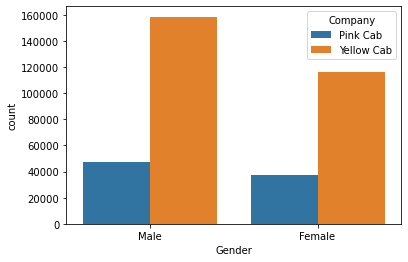

In [71]:
sns.countplot(x='Gender', hue ='Company', data= finalMerge )

#### Customer analysis by age

<AxesSubplot:xlabel='Age-binned', ylabel='count'>

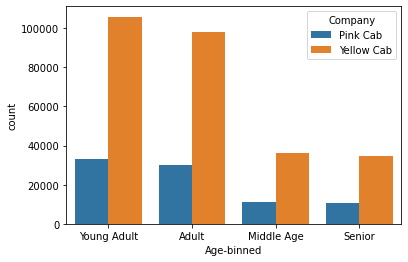

In [69]:
sns.countplot(x='Age-binned', hue ='Company',  data=finalMerge)

#### Customer Analysis by Income groups

<AxesSubplot:xlabel='Income-binned', ylabel='count'>

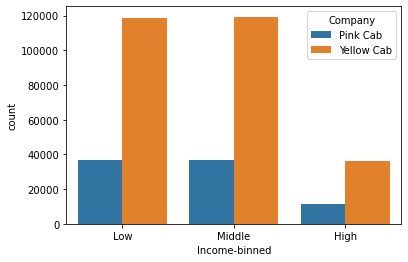

In [67]:
sns.countplot(x='Income-binned', hue = 'Company', data=finalMerge)

#### Customer analysis on preffered mode of payment

<AxesSubplot:xlabel='Payment_Mode', ylabel='count'>

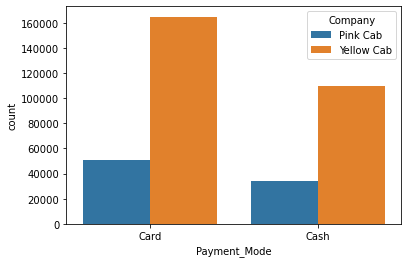

In [73]:
sns.countplot(x='Payment_Mode', hue = 'Company', data=finalMerge)

We can draw the following conclusions on our customerbase:
- Male generally use cab services more than women do
- Young adults and adults are the most frequent uses of cab services
- low and middle income induvuals use cab services more than those of high income
- The preffered mode of payment by customers is card

### Analysis for each cab service

#### Annual Profit analysis

<AxesSubplot:xlabel='year', ylabel='profit'>

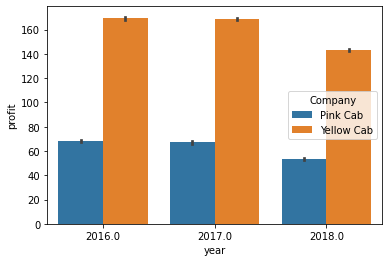

In [55]:
sns.barplot(x='year', y='profit', hue= 'Company', data = finalMerge)

#### Monthly profits analyis for ech cab service

<AxesSubplot:xlabel='month', ylabel='profit'>

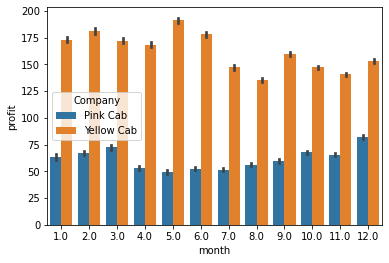

In [74]:
sns.barplot(x='month', y='profit', hue= 'Company', data = finalMerge)

#### Profits by City for each cab service

[Text(0, 0, 'ATLANTA GA'),
 Text(1, 0, 'AUSTIN TX'),
 Text(2, 0, 'BOSTON MA'),
 Text(3, 0, 'CHICAGO IL'),
 Text(4, 0, 'DALLAS TX'),
 Text(5, 0, 'DENVER CO'),
 Text(6, 0, 'LOS ANGELES CA'),
 Text(7, 0, 'MIAMI FL'),
 Text(8, 0, 'NASHVILLE TN'),
 Text(9, 0, 'NEW YORK NY'),
 Text(10, 0, 'ORANGE COUNTY'),
 Text(11, 0, 'PHOENIX AZ'),
 Text(12, 0, 'PITTSBURGH PA'),
 Text(13, 0, 'SACRAMENTO CA'),
 Text(14, 0, 'SAN DIEGO CA'),
 Text(15, 0, 'SEATTLE WA'),
 Text(16, 0, 'SILICON VALLEY'),
 Text(17, 0, 'TUCSON AZ'),
 Text(18, 0, 'WASHINGTON DC')]

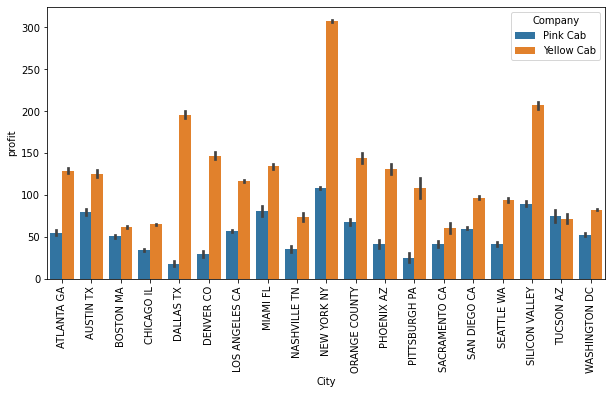

In [57]:
plt.figure(figsize=(10,5))
chart3 = sns.barplot(x='City', y='profit', hue= 'Company', data = finalMerge)
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)


#### Average profit per KM of the cab services

<AxesSubplot:xlabel='year', ylabel='profitPerKM'>

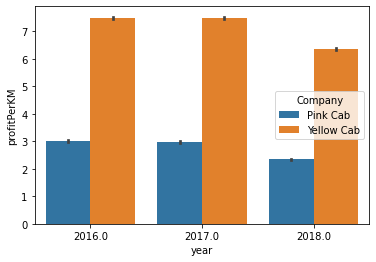

In [59]:
sns.barplot(x='year', y='profitPerKM', hue= 'Company', data = finalMerge)

#### Prices being charged by each cab service

<AxesSubplot:xlabel='year', ylabel='Price Charged'>

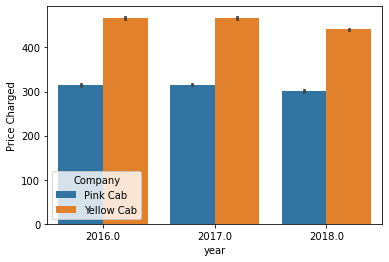

In [66]:
sns.barplot(x='year', y='Price Charged', hue= 'Company', data = finalMerge)

- from the above data, it is evident that Yellow cab is making more profit than Pink cab across all observed cities and through out the entire time period, despite Pink Cab being the more frequented service
- This may have been brought about by Yellow cab charging more for their services


In [64]:
corr = finalMerge.corr()
corr


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),profit,year,profitPerKM,month
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016913,-0.001269,-0.001570,-0.087130,0.941600,-0.110524,0.193844
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,0.462768,-0.001072,-0.000538,0.001033
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.864154,-0.036409,0.473222,-0.036288
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.486056,-0.001773,0.031053,-0.002720
Customer ID,-0.016913,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.306527,-0.002539,-0.394133,-0.030211
Age,-0.001269,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.005093,-0.000579,-0.006428,-0.000095
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.006148,-0.001617,0.008159,0.000536
profit,-0.087130,0.462768,0.864154,0.486056,-0.306527,-0.005093,0.006148,1.000000,-0.060567,0.779330,-0.059428
year,0.941600,-0.001072,-0.036409,-0.001773,-0.002539,-0.000579,-0.001617,-0.060567,1.000000,-0.076459,-0.007440
profitPerKM,-0.110524,-0.000538,0.473222,0.031053,-0.394133,-0.006428,0.008159,0.779330,-0.076459,1.000000,-0.078192


<AxesSubplot:>

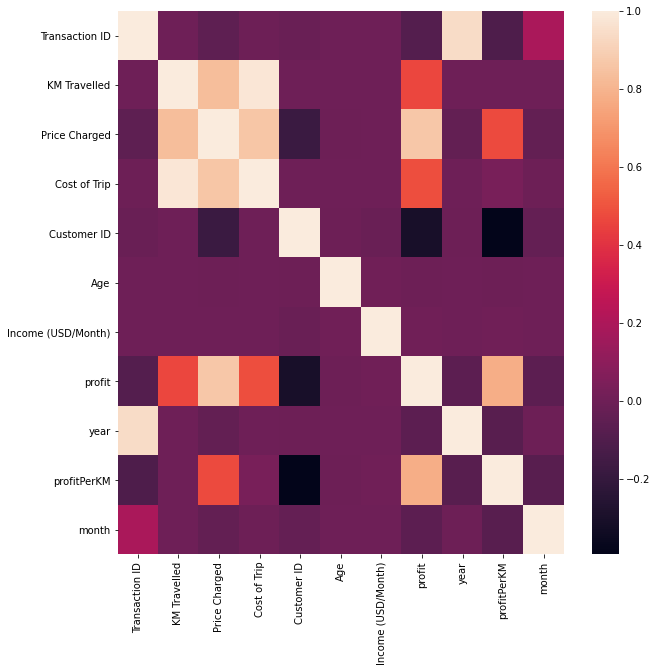

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax)


using the above heatmap, we can curate a list of highly correlated columns:
- KM travelled and Price charged
- cost of trip and price charged
- profit and profitPerKM
- profit and Price charged
- cost of trip and Km travelled

## Final conclusions and recommendations
Since we have analysed our data, we can test some of the hypothesis we had formulated:
- Cab services are the most popular in New York and the least popular in Pittsburgh
- Yellow cab charges more per KM
- Males are generally the most prevalent Cab services users but there is generally no prefernce of cab service
- Young adults and adults are the most frequent cab service users but there is generally no prefernce of cab service
- low and middle income induvuals use cab services more than those of high income  but there is generally no prefernce of cab service
- The preffered mode of payment by customers is card
- There is some seasonality in the cab service industry as the most frequented months for cab services are December and October


I would recommend the firm to invest in Yellow Cab due to the following reasons:
- Yellow cab has proven to have a better city outreach compared to Pink cab
- Yellow Cab has been consistently making more profit throughout the given time period
- Yellow Cab is preffered by the youner generation, which in most cases is the most populous